In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

C:\Users\zabiulla.khan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test_url = 'https://raw.githubusercontent.com/zabiullakhangithub/titanic_test.csv/master/test.csv'
test = pd.read_csv(test_url)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic.info()
print('------------------------------------------------------------')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket 

In [4]:
#drop useless columns
#since cabin has too many nulls, we need to delete it
#Also drop passenger_id, ticket, name, and embarked since logically they are useless in prediction
titanic_p = titanic.drop(["Cabin","PassengerId","Ticket","Name","Embarked","Fare"],axis=1)

test_p = test.drop(["Cabin","PassengerId","Ticket","Name","Embarked","Fare"],axis=1)

In [5]:
titanic_p.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [6]:
titanic_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 38.3+ KB


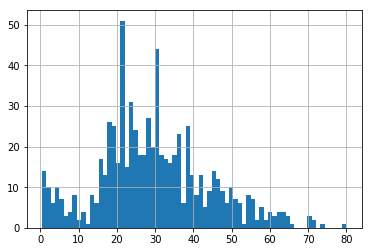

C:\Users\zabiulla.khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\zabiulla.khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


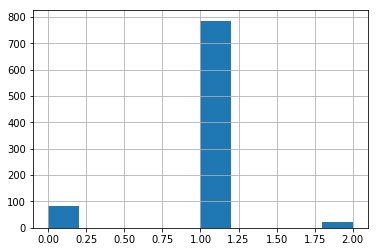

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Age_new     891 non-null int32
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 41.8+ KB


C:\Users\zabiulla.khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\zabiulla.khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


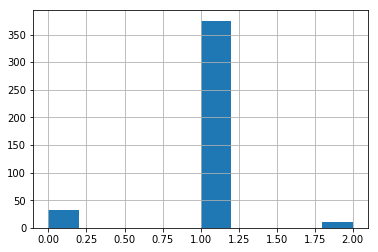

In [7]:
#Age
#Logically, when accidents occur, we normally give priority to children and old people. 
#Therefore, I divide age into 3 groups:(,16),(16,60),(60,) to represent child, adult and old
#since most passengers are adults, we fill nulls with adult
#0:child;1:adult,2:old
titanic_p['Age'].dropna().hist(bins=70)
plt.show()

titanic_p['Age_new'] = 1
titanic_p['Age_new'][titanic_p["Age"]<16] = 0
titanic_p['Age_new'][titanic_p["Age"]>60] = 2
titanic_p['Age_new']=titanic_p['Age_new'].astype(int)
titanic_p['Age_new'].hist()
plt.show()        
titanic_p.info()


test_p['Age_new'] = 1
test_p['Age_new'][test_p["Age"]<16] = 0
test_p['Age_new'][test_p["Age"]>60] = 2
test_p['Age_new']=test_p['Age_new'].astype(int)
test_p['Age_new'].hist()
plt.show()

In [8]:
#Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column to represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
titanic_p['Family'] =  titanic_p["Parch"] + titanic_p["SibSp"]
titanic_p['Family'].loc[titanic_p['Family'] > 0] = 1
titanic_p['Family'].loc[titanic_p['Family'] == 0] = 0

test_p['Family'] =  test_p["Parch"] + test_p["SibSp"]
test_p['Family'].loc[test_p['Family'] > 0] = 1
test_p['Family'].loc[test_p['Family'] == 0] = 0

# drop Parch & SibSp
titanic_p = titanic_p.drop(['SibSp','Parch'], axis=1)
test_p    = test_p.drop(['SibSp','Parch'], axis=1)

C:\Users\zabiulla.khan\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
#gender
#male is 1
titanic_p['Gender'] = 0
titanic_p['Gender'][titanic_p['Sex']=="male"] = 1

test_p['Gender'] = 0
test_p['Gender'][test_p['Sex']=="male"] = 1

C:\Users\zabiulla.khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\zabiulla.khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [10]:
#final data preparation
titanic_y = titanic_p['Survived']
titanic_x = titanic_p.drop(['Survived','Age',"Sex"],axis=1)

test_x = test_p.drop(['Age','Sex'],axis=1)

titanic_y.head()
titanic_x.head()
test_x.head()
titanic_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Pclass     891 non-null int64
Age_new    891 non-null int32
Family     891 non-null int64
Gender     891 non-null int64
dtypes: int32(1), int64(3)
memory usage: 24.4 KB


In [11]:
#decision tree model
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree = model_tree.fit(titanic_x, titanic_y)

print(model_tree.feature_importances_)
print(model_tree.score(titanic_x, titanic_y))
#The score of [Pclass	Age_new	Family	Gender] is:

[0.24949133 0.08455378 0.01735779 0.6485971 ]
0.8159371492704826


In [12]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
Pclass     418 non-null int64
Age_new    418 non-null int32
Family     418 non-null int64
Gender     418 non-null int64
dtypes: int32(1), int64(3)
memory usage: 11.5 KB


In [13]:
#predict
a = model_tree.predict(test_x)

test_x["Survived"] = a

In [14]:
test_data = test_x
test_data.head()

,Pclass,Age_new,Family,Gender,Survived
0,3,1,0,1,0
1,3,1,1,0,0
2,2,2,0,1,0
3,3,1,0,1,0
4,3,1,1,0,0


In [16]:
# capture survived or not info in a "submission_data.csv" file
submission_data = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':test_x['Survived']})

submission_data.to_csv("submission_data.csv",index=0)